In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

df=pd.read_csv('risk_factors_cervical_cancer.csv')

df.replace('?', np.NaN, inplace=True)

def compute_grade(df):    
    if (df['Biopsy']==1) | (df['Hinselmann'] == 1) | (df['Schiller'] == 1) | (df['Citology'] == 1):
        return 1
    else:
        return 0

df['target'] = df.apply(compute_grade, axis = 1)
df = df.drop(['Hinselmann', 'Schiller', 'Biopsy', 'Citology'], axis = 1)

#split dataset 80% trainning and 20% test set.
train_data, test_data = train_test_split(df, test_size=0.2, random_state=0)

train_data = train_data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1) #drop this columns, because they contains too much nulls
test_data = test_data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1)

train_data= train_data.fillna(train_data.median()) #replace null values with the median value of the column
test_data= test_data.fillna(test_data.median())

train_data['Age'] =( train_data['Age'] - train_data['Age'].mean() ) / train_data['Age'].std()  #standarilazation of Age
test_data['Age'] =( test_data['Age'] - test_data['Age'].mean() ) / test_data['Age'].std()

for x in list(train_data.keys()): 
    train_data[x] = train_data[x].astype('float')
    if (x!='Smokes' and x!='Smokes (packs/year)' and x!='Hormonal Contraceptives (years)' and x!='IUD (years)'): #because these columns must remain float
        train_data[x]=train_data[x].apply(np.int64)

for x in list(test_data.keys()):
    test_data[x] = test_data[x].astype('float')
    if (x!='Smokes' and x!='Smokes (packs/year)' and x!='Hormonal Contraceptives (years)' and x!='IUD (years)'): #because these columns must remain float
        test_data[x]=test_data[x].apply(np.int64)

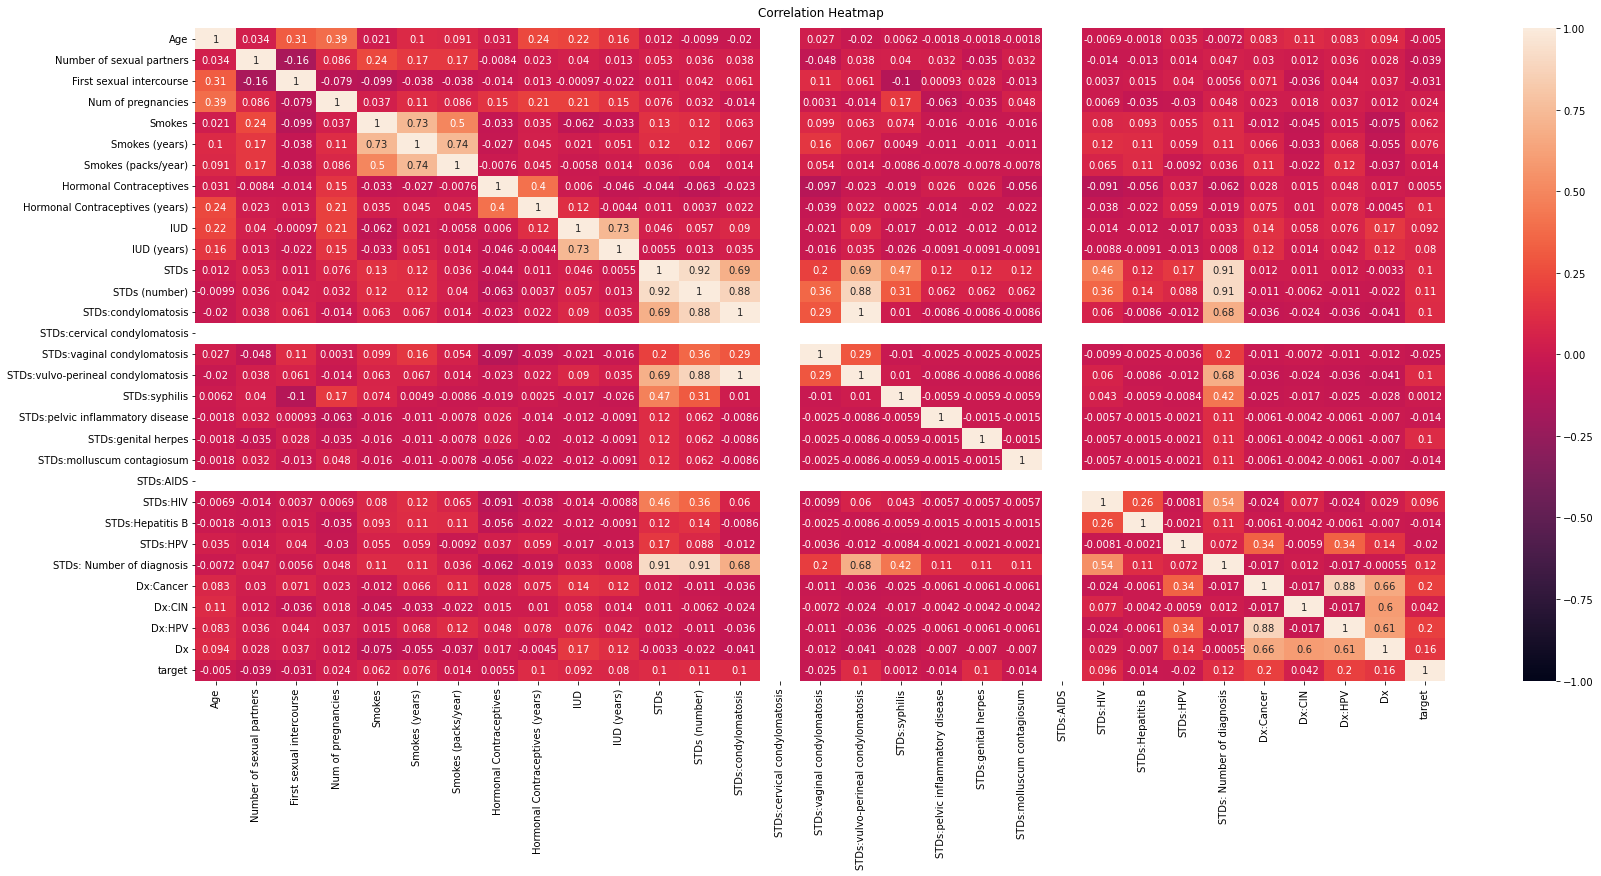

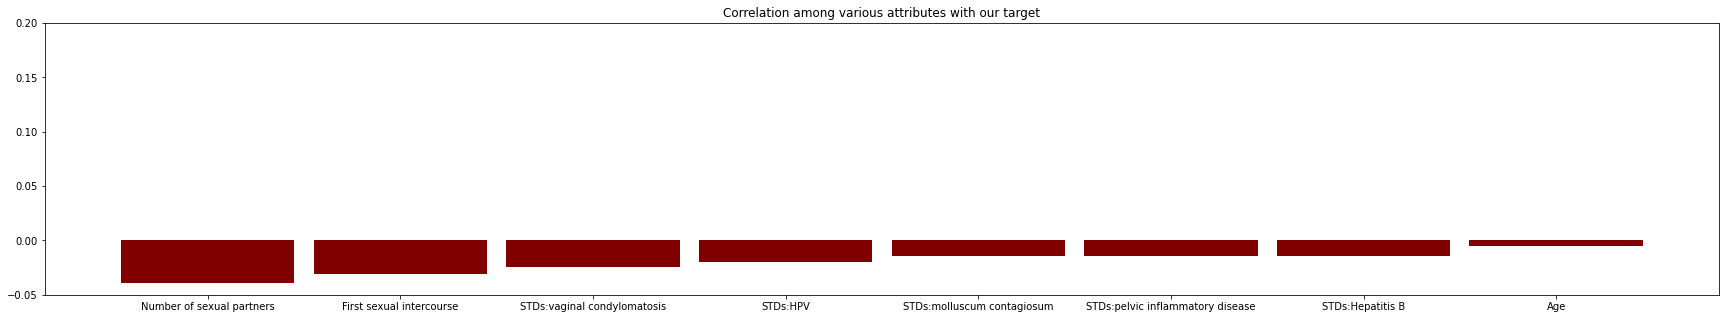

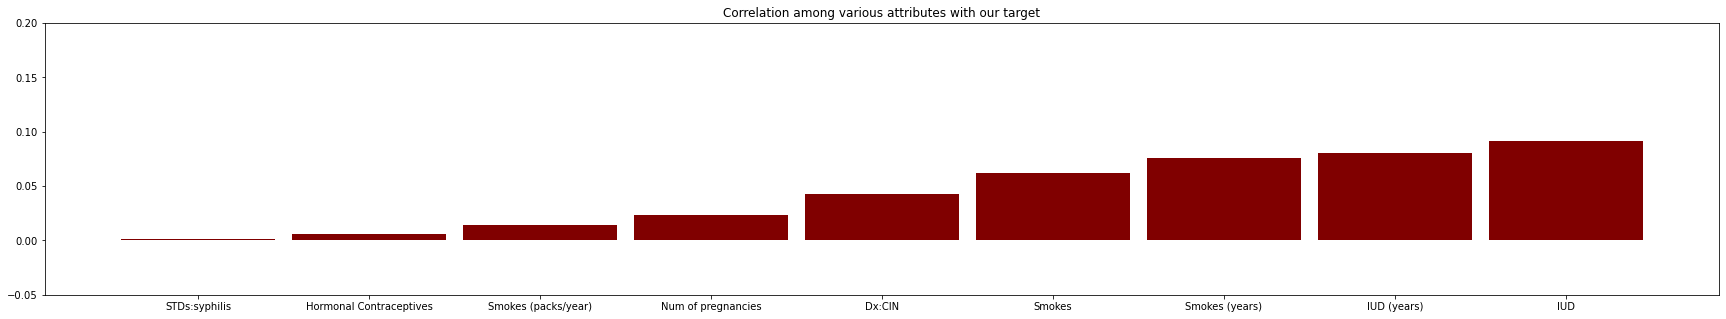

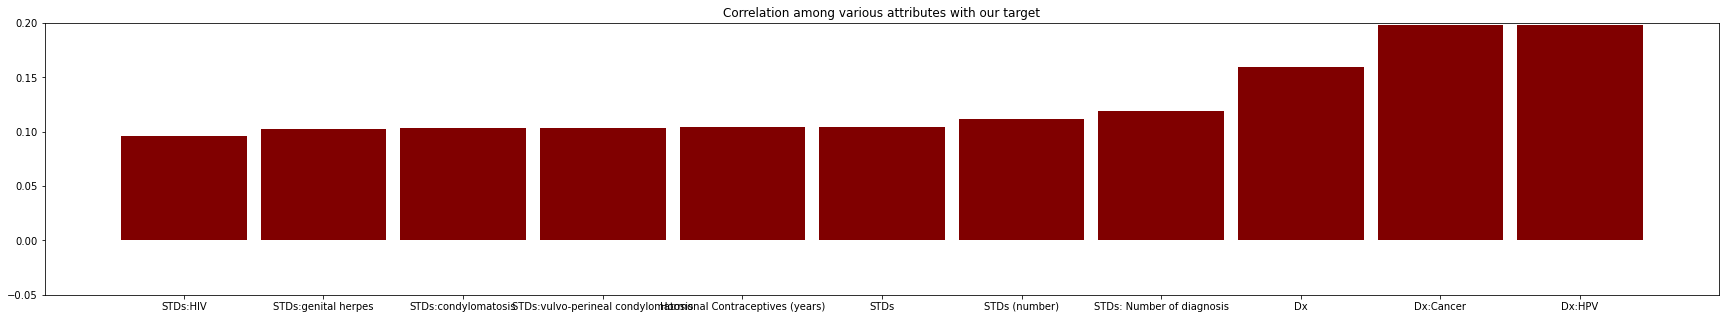

Most correlated attributes to the target in ascending order: 

                                      target
STDs:syphilis                       0.001203
Age                                 0.004996
Hormonal Contraceptives             0.005464
STDs:Hepatitis B                    0.014272
STDs:pelvic inflammatory disease    0.014272
STDs:molluscum contagiosum          0.014272
Smokes (packs/year)                 0.014440
STDs:HPV                            0.020199
Num of pregnancies                  0.023705
STDs:vaginal condylomatosis         0.024757
First sexual intercourse            0.030521
Number of sexual partners           0.039406
Dx:CIN                              0.042267
Smokes                              0.061724
Smokes (years)                      0.075653
IUD (years)                         0.080073
IUD                                 0.091723
STDs:HIV                            0.096187
STDs:genital herpes                 0.102285
STDs:condylomatosis                 0

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 12))
heatmap = sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#plot and see how much every variable is related to the target
#If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.
import numpy as np 
import matplotlib.pyplot as plt
df2=train_data.corr()
df3=df2['target']
df4=df3.to_frame()
df5=df4.sort_values(by=['target'])


df5a=df5.iloc[0:8]
my_keys = list(df5a.index) 
values = list(df5a['target'])
fig = plt.figure(figsize = (30, 5))
plt.bar(my_keys, values, color ='maroon', width = 0.9) 
ax = plt.gca()
ax.set_ylim([-0.05, 0.2])
plt.title("Correlation among various attributes with our target") 
plt.show()


df5b=df5.iloc[8:17]
my_keys = list(df5b.index) 
values = list(df5b['target'])

fig = plt.figure(figsize = (30, 5))

plt.bar(my_keys, values, color ='maroon', width = 0.9) 

ax = plt.gca()
ax.set_ylim([-0.05, 0.2])
plt.title("Correlation among various attributes with our target") 
plt.show()

df5c=df5.iloc[17:28]
my_keys = list(df5c.index) 
values = list(df5c['target'])

fig = plt.figure(figsize = (30, 5))

plt.bar(my_keys, values, color ='maroon', width = 0.9) 

ax = plt.gca()
ax.set_ylim([-0.05, 0.2])
plt.title("Correlation among various attributes with our target") 
plt.show()

df4['target']=abs(df4['target'])
df6=df4.sort_values(by=['target']) #sort attributes from the most unrelated to the most related

print('Most correlated attributes to the target in ascending order: ')
print('')
print(df6)


Before oversampling:  Counter({0: 602, 1: 84})


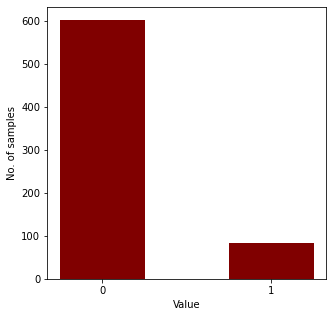

After  oversampling and undersampling:  Counter({0: 593, 1: 593})


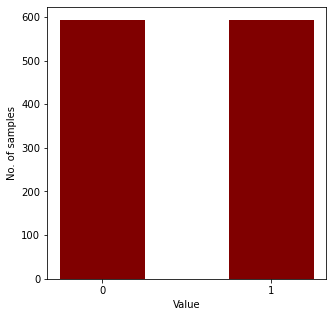

Number of new features afte PCA:  17

 Using PCA technique: 

Random Forest: Best GridSearchCV params:  {'max_depth': 15, 'n_estimators': 400}  and best RandomizedSearchCV params: {'n_estimators': 445, 'max_depth': 20}
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0]
144    0
774    0
263    0
788    1
847    0
      ..
156    0
597    0
624    0
50     0
823    0
Name: target, Length: 172, dtype: int64

rf_auc:  0.5984848484848484 
rf_accuracy:  0.8081395348837209 
rf_sensitivity:  0.3333333333333333 
rf_specificity:  0.8636363636363636 
rf_f1_score(0):  0.26666666666666666 
rf_f1_score(1):  0.8896321070234113

XGB: Best GridSearchCV params:  {'learning_rate': 0.1, 'max_depth': 15, 'n_esti

In [149]:
#PREDICTION WITH PCA (dimensionality reduction)

#we dropped only the 4 features from the dataset which had not any correlation with the target
train_data_pca = train_data.drop(['STDs:HPV', 'STDs:molluscum contagiosum','STDs:AIDS', 'STDs:cervical condylomatosis'], axis = 1)
test_data_pca = test_data.drop(['STDs:HPV', 'STDs:molluscum contagiosum','STDs:AIDS', 'STDs:cervical condylomatosis'], axis = 1)

#Apply SMOTETomek (oversampling + undersampling Method) after splitting the dataset. Because we do not need to change the test set data, we just need to balance the train data set, so that our model won't be biased
X_train=train_data_pca.drop(['target'], axis = 1).values
y_train=train_data_pca['target'].values
counter = Counter(y_train)
print('\nBefore oversampling: ',counter)
data = {'0':counter[0], '1':counter[1], }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='maroon', width = 0.5)
plt.xlabel("Value")
plt.ylabel("No. of samples")
plt.show()

oversample_undersample = SMOTETomek(random_state=2)
X_train, y_train = oversample_undersample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('After  oversampling and undersampling: ',counter)
data = {'0':counter[0], '1':counter[1], }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='maroon', width = 0.5)
plt.xlabel("Value")
plt.ylabel("No. of samples")
plt.show()



#Scaled the data and then use PCA method for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

y_test = test_data_pca['target']
x_test = test_data_pca.drop(['target'], axis = 1).values
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(0.95) # initiate PCA and classifier
X_train_transformed = pca.fit_transform(X_train_scaled) # transform / fit PCA
print('Number of new features afte PCA: ',X_train_transformed.shape[1])


x_test_scaled = scaler.transform(x_test)  #only transform the test data using already fitted scaler
x_test_transformed = pca.transform(x_test_scaled) # transform new data using already fitted pca (don't re-fit the pca)



grid_param_rf = {
    'n_estimators': [100, 400, 800],
    'max_depth': [5, 10, 15],
}
rand_param_rf = {
    'n_estimators': np.linspace(start=1, stop=1000, num=10, dtype=int),
    'max_depth': np.linspace(start=1, stop=20, num=5, dtype=int),
}

grid_param_xgb = {
    'n_estimators': [100, 400, 800],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.20],
}
rand_param_xgb = {
    'n_estimators': np.linspace(start=1, stop=1000, num=10, dtype=int),
    'max_depth': np.linspace(start=1, stop=20, num=5, dtype=int),
    'learning_rate': [0.05, 0.1, 0,15, 0.25, 0.4],
}

def fit_and_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred_proba1 = clf.predict_proba(X_test)[:, 1]  #*1
    y_pred_proba = (np.rint(y_pred_proba1)).astype(int) #*1 convert results to int (0 or 1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy=accuracy_score(y_test, y_pred_proba)  
    sensitivity=recall_score(y_test, y_pred_proba)
    specificity=recall_score(y_test, y_pred_proba, pos_label=0)
    f1_score_0=f1_score(y_test, y_pred_proba)
    f1_score_1=f1_score(y_test, y_pred_proba, pos_label=0)
    return fpr, tpr, auc, accuracy, sensitivity, specificity,  f1_score_0, f1_score_1


def finetune(clf, grid_param, rand_param, X, Y):

    gridClassifier = GridSearchCV(clf, grid_param, cv=2, scoring='roc_auc')
    gridClassifier.fit(X, Y)
    grid_best = gridClassifier.best_params_

    randomClassifier = RandomizedSearchCV(clf, rand_param, n_iter=50, cv=2, scoring='roc_auc')
    randomClassifier.fit(X, Y)
    rand_best = randomClassifier.best_params_

    return grid_best, rand_best
print('\n Using PCA technique: ')
rf = RandomForestClassifier(max_depth=5, random_state=0)

rf_grid_best, rf_rand_best = finetune(classifier, grid_param_rf, rand_param_rf, X_train_transformed, y_train)
print("\nRandom Forest: Best GridSearchCV params: ", rf_grid_best, " and best RandomizedSearchCV params:", rf_rand_best)

rf_fpr, rf_tpr, rf_auc, rf_accuracy, rf_sensitivity, rf_specificity, rf_f1_score_0, rf_f1_score_1 = fit_and_evaluate(
    RandomForestClassifier(random_state=0, n_estimators=rf_rand_best["n_estimators"], max_depth=rf_rand_best["max_depth"]),
    X_train_transformed, y_train, x_test_transformed, y_test)

print('\nrf_auc: ',rf_auc,'\nrf_accuracy: ',rf_accuracy, '\nrf_sensitivity: ', rf_sensitivity, '\nrf_specificity: ', rf_specificity, '\nrf_f1_score(0): ', rf_f1_score_0, '\nrf_f1_score(1): ', rf_f1_score_1)

xgb = XGBClassifier(random_state=0)

xgb_grid_best, xgb_rand_best = finetune(xgb, grid_param_xgb, rand_param_xgb, X_train_transformed, y_train)
print("\nXGB: Best GridSearchCV params: ", xgb_grid_best, " and best RandomizedSearchCV params:", xgb_rand_best)

xgb_fpr, xgb_tpr, xgb_auc, xgb_accuracy, xgb_sensitivity, xgb_specificity, xgb_f1_score_0, xgb_f1_score_1 = fit_and_evaluate(
    XGBClassifier(random_state=0, n_estimators=xgb_rand_best["n_estimators"], max_depth=xgb_rand_best["max_depth"]),
    X_train_transformed, y_train, x_test_transformed, y_test)

print('\nxgb_auc: ',xgb_auc,'\nxgb_accuracy: ',xgb_accuracy, '\nxgb_sensitivity: ', xgb_sensitivity, '\nxgb_specificity: ', xgb_specificity, '\nxgb_f1_score(0): ', xgb_f1_score_0, '\nxgb_f1_score(1): ', xgb_f1_score_1 )


Before oversampling:  Counter({0: 602, 1: 84})


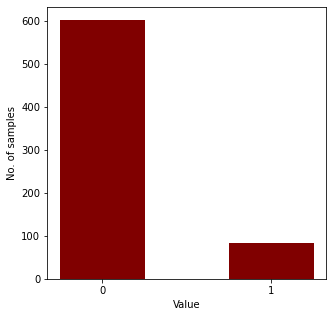

After  oversampling and undersampling:  Counter({0: 589, 1: 589})


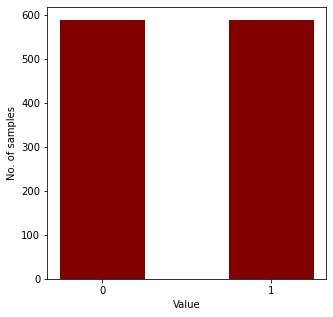


 Without PCA technique: 

Random Forest: Best GridSearchCV params:  {'max_depth': 15, 'n_estimators': 800}  and best RandomizedSearchCV params: {'n_estimators': 778, 'max_depth': 20}

rf_auc:  0.550865800865801 
rf_accuracy:  0.8546511627906976 
rf_sensitivity:  0.16666666666666666 
rf_specificity:  0.935064935064935 
rf_f1_score(0):  0.1935483870967742 
rf_f1_score(1):  0.9201277955271565

XGB: Best GridSearchCV params:  {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 100}  and best RandomizedSearchCV params: {'n_estimators': 223, 'max_depth': 15, 'learning_rate': 0.4}

xgb_auc:  0.5281385281385282 
xgb_accuracy:  0.813953488372093 
xgb_sensitivity:  0.16666666666666666 
xgb_specificity:  0.8896103896103896 
xgb_f1_score(0):  0.15789473684210525 
xgb_f1_score(1):  0.8954248366013072


In [155]:
#PREDICTION WITHOUT PCA

#drop the most unrelated attributes
train_data = train_data.drop(['STDs:syphilis', 'Smokes (packs/year)', 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:Hepatitis B', 'STDs:AIDS', 'STDs:cervical condylomatosis'], axis = 1)
test_data = test_data.drop(['STDs:syphilis', 'Smokes (packs/year)', 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:Hepatitis B', 'STDs:AIDS', 'STDs:cervical condylomatosis'], axis = 1)

#The attributes “STDs”, “STDs_vulvo_perineal_condylomatosis” and “STDs_condylomatosis” have a high correlation among themselves. 
#So, we removed the attributes “STDs_vulvo_perineal_condylomatosis” and “STDs_condylomatosis” from the data set. 
#Also, a high correlation  exists between “STDs_number” and “STDs_No_of_diagnosis”.  So, we removed “STDs_No_of_diagnosis” attribute from the data set.
train_data = train_data.drop(['STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis', 'STDs: Number of diagnosis'], axis = 1)
test_data = test_data.drop(['STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis', 'STDs: Number of diagnosis'], axis = 1)

#Apply SMOTETomek (oversampling + undersampling Method) after splitting the dataset. Because we do not need to change the test set data, we just need to balance the train data set, so that our model won't be biased
X_train=train_data.drop(['target'], axis = 1).values
y_train=train_data['target'].values
counter = Counter(y_train)
print('\nBefore oversampling: ',counter)
data = {'0':counter[0], '1':counter[1], }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='maroon', width = 0.5)
plt.xlabel("Value")
plt.ylabel("No. of samples")
plt.show()

oversample_undersample = SMOTETomek(random_state=2)
X_train, y_train = oversample_undersample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('After  oversampling and undersampling: ',counter)
data = {'0':counter[0], '1':counter[1], }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='maroon', width = 0.5)
plt.xlabel("Value")
plt.ylabel("No. of samples")
plt.show()

y_test = test_data['target']
x_test = test_data.drop(['target'], axis = 1).values

grid_param_rf = {
    'n_estimators': [100, 400, 800],
    'max_depth': [5, 10, 15],
}
rand_param_rf = {
    'n_estimators': np.linspace(start=1, stop=1000, num=10, dtype=int),
    'max_depth': np.linspace(start=1, stop=20, num=5, dtype=int),
}

grid_param_xgb = {
    'n_estimators': [100, 400, 800],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.20],
}
rand_param_xgb = {
    'n_estimators': np.linspace(start=1, stop=1000, num=10, dtype=int),
    'max_depth': np.linspace(start=1, stop=20, num=5, dtype=int),
    'learning_rate': [0.05, 0.1, 0,15, 0.25, 0.4],
}

def fit_and_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred_proba1 = clf.predict_proba(X_test)[:, 1]  #*1
    y_pred_proba = (np.rint(y_pred_proba1)).astype(int) #*1 convert results to int (0 or 1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy=accuracy_score(y_test, y_pred_proba)  
    sensitivity=recall_score(y_test, y_pred_proba)
    specificity=recall_score(y_test, y_pred_proba, pos_label=0)
    f1_score_0=f1_score(y_test, y_pred_proba)
    f1_score_1=f1_score(y_test, y_pred_proba, pos_label=0)
    return fpr, tpr, auc, accuracy, sensitivity, specificity,  f1_score_0, f1_score_1


def finetune(clf, grid_param, rand_param, X, Y):

    gridClassifier = GridSearchCV(clf, grid_param, cv=2, scoring='roc_auc')
    gridClassifier.fit(X, Y)
    grid_best = gridClassifier.best_params_

    randomClassifier = RandomizedSearchCV(clf, rand_param, n_iter=50, cv=2, scoring='roc_auc')
    randomClassifier.fit(X, Y)
    rand_best = randomClassifier.best_params_

    return grid_best, rand_best

print('\n Without PCA technique: ')

rf = RandomForestClassifier(max_depth=5, random_state=0)

rf_grid_best, rf_rand_best = finetune(rf, grid_param_rf, rand_param_rf, X_train, y_train)
print("\nRandom Forest: Best GridSearchCV params: ", rf_grid_best, " and best RandomizedSearchCV params:", rf_rand_best)

rf_fpr, rf_tpr, rf_auc, rf_accuracy, rf_sensitivity, rf_specificity, rf_f1_score_0, rf_f1_score_1 = fit_and_evaluate(
    RandomForestClassifier(random_state=0, n_estimators=rf_rand_best["n_estimators"], max_depth=rf_rand_best["max_depth"]),
    X_train, y_train, x_test, y_test)

print('\nrf_auc: ',rf_auc,'\nrf_accuracy: ',rf_accuracy, '\nrf_sensitivity: ', rf_sensitivity, '\nrf_specificity: ', rf_specificity, '\nrf_f1_score(0): ', rf_f1_score_0, '\nrf_f1_score(1): ', rf_f1_score_1)
   
xgb = XGBClassifier(random_state=0)

xgb_grid_best, xgb_rand_best = finetune(xgb, grid_param_xgb, rand_param_xgb, X_train, y_train)
print("\nXGB: Best GridSearchCV params: ", xgb_grid_best, " and best RandomizedSearchCV params:", xgb_rand_best)

xgb_fpr, xgb_tpr, xgb_auc, xgb_accuracy, xgb_sensitivity, xgb_specificity, xgb_f1_score_0, xgb_f1_score_1 = fit_and_evaluate(
    XGBClassifier(random_state=0, n_estimators=xgb_rand_best["n_estimators"], max_depth=xgb_rand_best["max_depth"]),
    X_train, y_train, x_test, y_test)

print('\nxgb_auc: ',xgb_auc,'\nxgb_accuracy: ',xgb_accuracy, '\nxgb_sensitivity: ', xgb_sensitivity, '\nxgb_specificity: ', xgb_specificity, '\nxgb_f1_score(0): ', xgb_f1_score_0, '\nxgb_f1_score(1): ', xgb_f1_score_1 )